In [6]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
%matplotlib inline
%precision 4

u'%.4f'

In [4]:
df = pd.read_csv('../DSI-CHI-1/lessons/week-08/2.2-linear-regression-with-bayes/assets/datasets/polls.csv', index_col=0)

In [5]:
df.head()

,org,year,survey,bush,state,edu,age,female,black,weight
1,cbsnyt,1,9152,1.0,7,2,2,1,0,1403
2,cbsnyt,1,9152,1.0,33,4,3,0,0,778
3,cbsnyt,1,9152,0.0,20,2,1,1,0,1564
4,cbsnyt,1,9152,1.0,31,3,2,1,0,1055
5,cbsnyt,1,9152,1.0,18,3,1,1,0,1213


In [7]:
with pm.Model() as logistic_model:
    pm.glm.glm('bush ~ female + black', df, family=pm.glm.families.Binomial())
    trace_logistic_model = pm.sample(2000, pm.NUTS(), progressbar=True)

100%|██████████| 2000/2000 [00:22<00:00, 88.55it/s] 


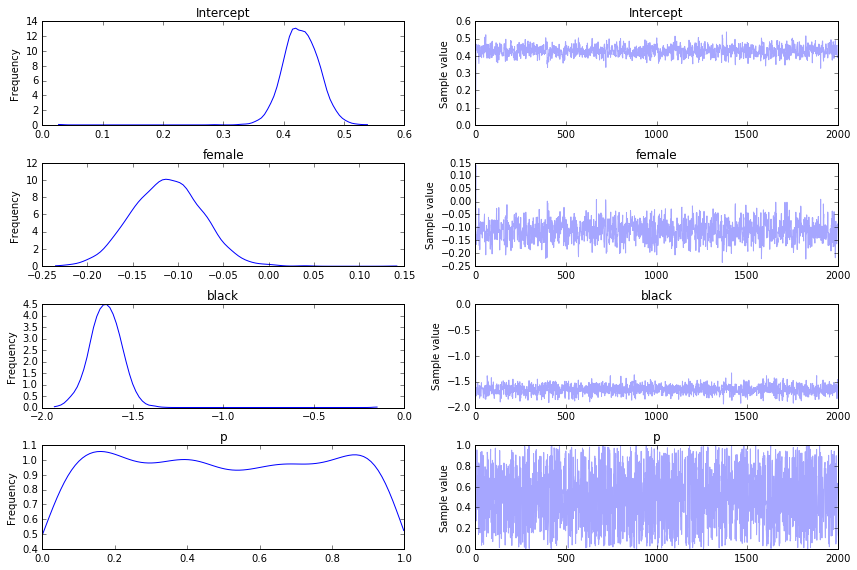

In [8]:
plt.figure(figsize=(7, 7))
pm.traceplot(trace_logistic_model)
plt.tight_layout()

In [9]:
pm.summary(trace_logistic_model)


Intercept:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  0.428            0.031            0.001            [0.372, 0.483]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  0.373          0.409          0.429          0.449          0.485


female:

  Mean             SD               MC Error         95% HPD interval
  -------------------------------------------------------------------
  
  -0.112           0.038            0.001            [-0.186, -0.041]

  Posterior quantiles:
  2.5            25             50             75             97.5
  |--------------|==============|==============|--------------|
  
  -0.185         -0.139         -0.112         -0.087         -0.039


black:

  Mean             SD               MC Error         95% HPD interval
  -----------------

In [10]:
trace_logistic_model['Intercept']

array([ 0.0271,  0.0271,  0.2858, ...,  0.4364,  0.391 ,  0.3975])

In [11]:
trace_logistic_model['black']

array([-0.151 , -0.151 , -1.3915, ..., -1.6315, -1.5607, -1.4596])

In [12]:
trace_logistic_model['female']

array([ 0.0401,  0.0401,  0.1416, ..., -0.1088, -0.1071, -0.087 ])

In [13]:
def plot_findings(trace, x_axis, y_axis):
    x = trace[x_axis]
    y = trace[y_axis]
    plt.scatter(x, y)
    plt.xlabel('%s estimates' % x_axis)
    plt.ylabel('%s estimates' % y_axis)
    plt.show()

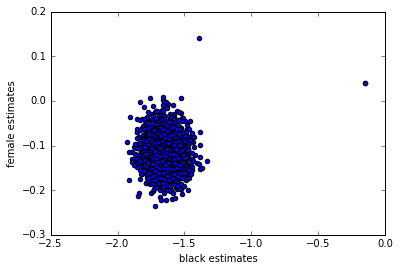

In [14]:
plot_findings(trace_logistic_model, 'black', 'female')

In [15]:
import seaborn as sns

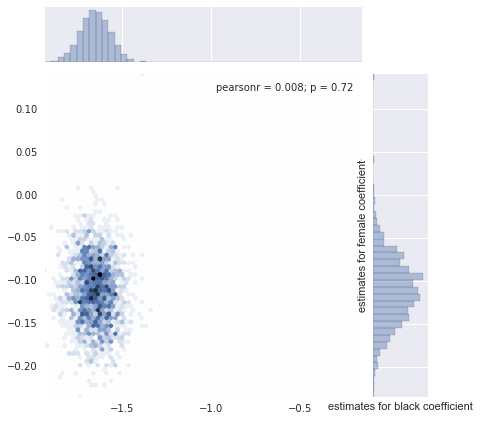

In [16]:
sns.jointplot(trace_logistic_model['black'], trace_logistic_model['female'], kind="hex")
plt.xlabel('estimates for black coefficient')
plt.ylabel('estimates for female coefficient')
plt.show()

trying to compare across two different models what does each black and female coefficient look like. Colored by how often each occurs shown by center dots. What does this tell us? we have 2,000 coefficients for each and what do they look like as a whole. Joint negative liklihood for blacks to vote for Bush and women to vote for Bush. Not just what avg will tell us, but also what the coefficients will tell us. This is exploratory. We are not plotting individual values we made 2,000 models each model has coefficients and that we plotted to get a sense of what its telling us about the world.

Because PyMC is going to lack the nice predict function that we've come to expect from sklearn, we'll have to make one ourselves by extracting the coefficients that have been found and defining them ourselves in a function:

In [23]:
# for every single one of those 2,000 models it will give probability based on intercept, black, and female. Instead of predicting one number it predicts 2,000

def predict_indiv_model(black, female):
    # Returns a series of numbers between 0 and 1 for each run of logistic model
    return 1 / (1 + np.exp(-(trace_logistic_model['Intercept'] +
                        (trace_logistic_model['black'] * black) + 
                        (trace_logistic_model['female'] * female))))

In [24]:
# plots out flat line where avg result is

def plot_results(y_series):
    plt.scatter(np.linspace(0, len(y_series), len(y_series)), 
               y_series)
    plt.hlines(y_series.mean(), 0, len(y_series))
    plt.xlabel('Model iteration')
    plt.ylabel('P(Y = 1)')
    plt.show()

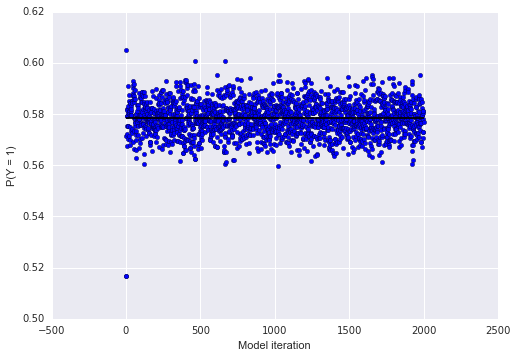

In [25]:
# non black female voters

plot_results(predict_indiv_model(0, 1))

in general for non black female voters model avg is around 58% on avg, which means it is likely that non-black females will vote for Bush.
Models predicts that if voter is non-black and female they are 58% likely to vote for Bush.

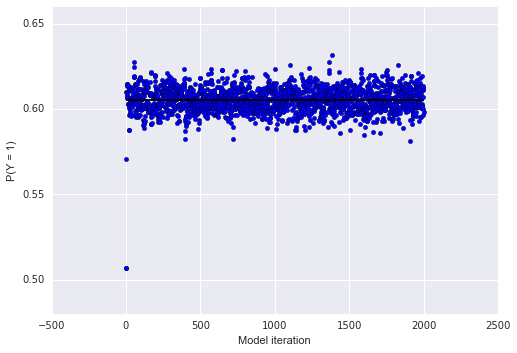

In [26]:
# non-black non-female

plot_results(predict_indiv_model(0, 0))

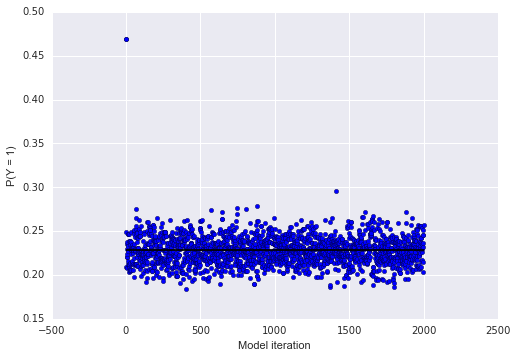

In [27]:
# black non-female

plot_results(predict_indiv_model(1, 0))

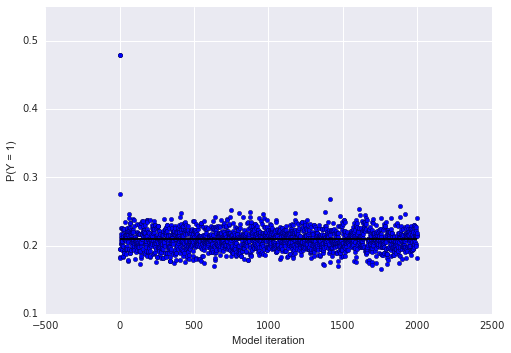

In [28]:
# black female

plot_results(predict_indiv_model(1, 1))

In [29]:
df.head(2)

,org,year,survey,bush,state,edu,age,female,black,weight
1,cbsnyt,1,9152,1.0,7,2,2,1,0,1403
2,cbsnyt,1,9152,1.0,33,4,3,0,0,778


In [30]:
df = df.join(pd.get_dummies(df['edu'], prefix='edu_'))

In [31]:
df = df.join(pd.get_dummies(df['age'], prefix='age_'))

In [ ]:
start by adding just age dmmies
# get rest of codealong

In [ ]:
with pm.Model() as logistic_model:
    pm.glm.glm('bush ~ female + black', df, family=pm.glm.families.Binomial())
    trace_logistic_model = pm.sample(2000, pm.NUTS(), progressbar=True)

In [ ]:
# scratch this 

def simple_function(*args):
    for item in args:
        print item
        
simple_function(1,2,3,4,5)

func gives some number of arguments, can give a dict, 

In [ ]:
# heres an easier way

def predict(dictionary, model):
    coefs = sum([model[key] * value for key, value in dictionary.items()])
    coefs += model['Intercept']
    return 1 / (1 + np.exp(-(coefs))
    
    

In [32]:
sample_person = {
    'black' : 0,
    'female' : 1,
    'age_1' : 0,
    'age_2' : 1
}

predict(sample_person, trace_logistic_model_age)

SyntaxError: invalid syntax (<ipython-input-32-d4e8f9d020f8>, line 1)

In [ ]:
print [(key, value) for key, value in dictionary.items()]